<a href="https://colab.research.google.com/github/TBhanusai/AlMl-project/blob/main/svm_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
file_path = '/content/capstone project(dataset2).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

In [ ]:
print(data.head())

       State         District   Year Range  Kharif Crop Area (Hectares)  \
0  Karnataka  Bangalore rural  1998 - 1999                        23543   
1  Karnataka  Bangalore rural  1999 - 2000                        18643   
2  Karnataka  Bangalore rural  2000 - 2001                        17892   
3  Karnataka  Bangalore rural  2001 - 2002                        12305   
4  Karnataka  Bangalore rural  2002 - 2003                        10732   

   Kharif Production (Tonnes)  Kharif Yield (Tonne/Hectare)  \
0                       24490                          1.04   
1                       14273                          0.77   
2                       16596                          0.93   
3                       14116                          1.15   
4                       10261                          0.96   

   Rabi Crop Area (Hectare)  Rabi Production (Tonnes)  \
0                    1113.0                    1319.0   
1                     488.0                     536.0   

In [ ]:
data.tail()

,State,District,Year Range,Kharif Crop Area (Hectares),Kharif Production (Tonnes),Kharif Yield (Tonne/Hectare),Rabi Crop Area (Hectare),Rabi Production (Tonnes),Rabi Yield (Tonne/Hectare),Summer Crop Area (Hectare),...,Summer Rainfall (in mm),Annual Rainfall(in mm),Fertilizer Quantity (kg/ha),Nitrogen (%),Phosphorus (%),Potassium (%),Calcium (%),Sulfur (%),Zinc (%),Boron (%)
233,Karnataka,Tumkur,2018 - 2019,63528,36332,0.57,0.0,0.0,0.00,601,...,206.19,721.54,247.32,3.04,3.14,2.82,3.84,1.14,1.90,0.60
234,Karnataka,Tumkur,2019 - 2020,48641,43205,0.89,0.0,0.0,0.00,620,...,254.11,891.98,91.00,2.86,3.00,0.99,2.48,1.39,0.15,0.17
235,Karnataka,Tumkur,2020 - 2021,85134,68618,0.81,0.0,0.0,0.00,1033,...,284.08,1189.69,277.09,8.80,3.12,4.06,2.06,0.51,0.80,0.89
236,Karnataka,Tumkur,2021 - 2022,66379,40956,0.62,0.0,0.0,0.00,397,...,249.02,761.49,273.16,8.93,7.07,3.38,2.62,2.37,1.29,0.92
237,Karnataka,Tumkur,2022 - 2023,46136,32526,0.71,2659.0,5796.0,2.18,918,...,158.20,874.56,70.11,6.75,5.74,5.10,3.08,2.34,1.95,0.17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         238 non-null    object 
 1   District                      238 non-null    object 
 2   Year Range                    238 non-null    object 
 3   Kharif Crop Area (Hectares)   238 non-null    int64  
 4   Kharif Production (Tonnes)    238 non-null    int64  
 5   Kharif Yield (Tonne/Hectare)  238 non-null    float64
 6   Rabi Crop Area (Hectare)      236 non-null    float64
 7   Rabi Production (Tonnes)      237 non-null    float64
 8   Rabi Yield (Tonne/Hectare)    237 non-null    float64
 9   Summer Crop Area (Hectare)    238 non-null    int64  
 10  Summer Production (Tonnes)    238 non-null    int64  
 11  Summer Yield (Tonne/Hectare)  238 non-null    float64
 12    Kharif Temperature (°C)     238 non-null    float64
 13    Rab

In [ ]:
data.describe()

,Kharif Crop Area (Hectares),Kharif Production (Tonnes),Kharif Yield (Tonne/Hectare),Rabi Crop Area (Hectare),Rabi Production (Tonnes),Rabi Yield (Tonne/Hectare),Summer Crop Area (Hectare),Summer Production (Tonnes),Summer Yield (Tonne/Hectare),Kharif Temperature (°C),...,Summer Rainfall (in mm),Annual Rainfall(in mm),Fertilizer Quantity (kg/ha),Nitrogen (%),Phosphorus (%),Potassium (%),Calcium (%),Sulfur (%),Zinc (%),Boron (%)
count,238.000000,238.000000,238.000000,236.000000,237.000000,237.000000,238.000000,238.000000,238.000000,238.00000,...,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,20038.924370,13589.726891,0.812185,581.338983,780.649789,0.591603,79.978992,87.995798,0.304664,27.35042,...,174.699160,984.721975,173.888277,5.420504,4.305504,3.495420,2.720126,1.610084,1.096387,0.487353
std,35758.097846,26955.306406,0.302764,2009.866379,3001.159846,0.606763,279.831104,326.806495,0.482547,4.51008,...,72.677731,208.822297,70.038252,2.602590,2.077165,1.540776,1.281264,0.797236,0.544929,0.269153
min,10.000000,8.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.10000,...,50.110000,435.150000,50.010000,1.020000,0.510000,0.530000,0.520000,0.210000,0.100000,0.050000
25%,1382.500000,1142.250000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.40000,...,110.697500,837.470000,116.255000,3.142500,2.627500,2.132500,1.622500,0.957500,0.582500,0.260000
50%,5574.500000,4516.500000,0.780000,17.000000,14.000000,0.750000,0.000000,0.000000,0.000000,27.20000,...,173.590000,971.925000,174.085000,5.440000,4.235000,3.545000,2.680000,1.550000,1.150000,0.480000
75%,17658.250000,12515.750000,1.030000,228.750000,168.000000,1.000000,5.750000,5.000000,0.800000,31.40000,...,241.152500,1111.095000,237.290000,7.857500,6.102500,4.830000,3.835000,2.355000,1.547500,0.715000
max,174731.000000,237842.000000,1.770000,15392.000000,26342.000000,2.180000,1884.000000,2408.000000,2.000000,35.00000,...,297.850000,1466.830000,296.730000,9.890000,7.980000,5.990000,4.980000,2.990000,2.000000,0.980000


In [ ]:
data.columns

Index(['State', 'District', 'Year Range', 'Kharif Crop Area (Hectares)',
       'Kharif Production (Tonnes)', 'Kharif Yield (Tonne/Hectare)',
       'Rabi Crop Area (Hectare)', 'Rabi Production (Tonnes)',
       'Rabi Yield (Tonne/Hectare)', 'Summer Crop Area (Hectare)',
       'Summer Production (Tonnes)', 'Summer Yield (Tonne/Hectare)',
       '  Kharif Temperature (°C)', '  Rabi Temperature (°C)',
       '  Summer Temperature (°C)', 'Annual Temperature (°C)',
       'Kharif Rainfall (in mm)', 'Rabi Rainfall (in mm)',
       'Summer Rainfall (in mm)', 'Annual Rainfall(in mm)',
       'Fertilizer Quantity (kg/ha)', 'Nitrogen (%)', 'Phosphorus (%)',
       'Potassium (%)', 'Calcium (%)', 'Sulfur (%)', 'Zinc (%)', 'Boron (%)'],
      dtype='object')

In [ ]:
data.shape

(238, 28)

In [ ]:
data.isnull()

,State,District,Year Range,Kharif Crop Area (Hectares),Kharif Production (Tonnes),Kharif Yield (Tonne/Hectare),Rabi Crop Area (Hectare),Rabi Production (Tonnes),Rabi Yield (Tonne/Hectare),Summer Crop Area (Hectare),...,Summer Rainfall (in mm),Annual Rainfall(in mm),Fertilizer Quantity (kg/ha),Nitrogen (%),Phosphorus (%),Potassium (%),Calcium (%),Sulfur (%),Zinc (%),Boron (%)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
234,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Define features (X) and target variable (Y)
X = data.drop(columns=['Kharif Yield (Tonne/Hectare)'])
Y = data['Kharif Yield (Tonne/Hectare)']

In [ ]:
#Identify Categorical and Numerical Columns:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist() # Get numerical columns

In [ ]:
# Create a column transformer that applies OneHotEncoder to categorical columns and imputes missing values for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['float64', 'int64']).columns.tolist())
    ]
)


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the SVM model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(preprocessor.fit_transform(X_train), Y_train)  # Fit the model to the training data

SVR(C=100, gamma=0.1)

In [ ]:
# Create a pipeline that first transforms the data and then fits the SVM model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Scale features after encoding and imputing
    ('svr', SVR(kernel='linear'))   # SVM model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, Y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['State', 'District',
                                                   'Year Range']),
                                                 ('num', SimpleImputer(),
                                                  ['Kharif Crop Area '
                                                   '(Hectares)',
                                                   'Kharif Production (Tonnes)',
                                                   'Rabi Crop Area (Hectare)',
                                                   'Rabi Production (Tonnes)',
                                                   'Rabi Yield (Tonne/Hectare)',
                                                   'Summer Crop Area (Hectare)',
                                                   'Summer Production (Tonnes)',
                                                   'Summer Yield '
                                                   '(Tonne...
                                                   '  Kharif Temperature (°C)',
                                                   '  Rabi Temperature (°C)',
                                                   '  Summer Temperature (°C)',
                                                   'Annual Temperature (°C)',
                                                   'Kharif Rainfall (in mm)',
                                                   'Rabi Rainfall (in mm)',
                                                   'Summer Rainfall (in mm)',
                                                   'Annual Rainfall(in mm)',
                                                   'Fertilizer Quantity '
                                                   '(kg/ha)',
                                                   'Nitrogen (%)',
                                                   'Phosphorus (%)',
                                                   'Potassium (%)',
                                                   'Calcium (%)', 'Sulfur (%)',
                                                   'Zinc (%)',
                                                   'Boron (%)'])])),
                ('scaler', StandardScaler()), ('svr', SVR(kernel='linear'))])

In [ ]:
# Predicting the results for the test set using the pipeline
Y_pred = pipeline.predict(X_test)
print(Y_pred)

[1.12374342 0.88200413 0.96474798 0.53551013 1.10336059 0.68458624
 0.95916422 0.92361187 1.15990966 0.23947409 0.80949574 0.39007755
 0.64660569 0.91515907 0.79043819 0.85192984 1.08310511 1.13545912
 1.04083455 0.96861559 1.05577335 0.51452408 1.02531538 0.97903139
 0.81938969 0.49446137 1.00859399 0.73923683 1.16992363 0.65781514
 0.50673892 0.84663199 0.90270084 0.63634722 0.93373594 0.92875647
 0.79396209 0.84235395 1.05589723 1.17081666 0.82414325 0.80367882
 0.85651337 1.17343506 0.92802405 0.8939204  0.59760848 0.22786827]


In [ ]:
# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.038895911077252744
R^2 Score: 0.5480064219819349


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'pipeline' is the trained model you want to use
model = pipeline  # Assign the pipeline to the variable 'model'

# Predict on the test data
y_pred = model.predict(X_test)

# Flatten y_test and y_pred to 1D
y_test = np.ravel(Y_test)  # or y_test.flatten()  # Use Y_test instead of y_test
y_pred = np.ravel(y_pred)  # or y_pred.flatten()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = (np.abs((y_test - y_pred) / y_test)).mean() * 100

# Calculate accuracy as (100 - MAPE)
accuracy = 100 - mape

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"R² Score: {r2:.5f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

Mean Squared Error (MSE): 0.03890
Root Mean Squared Error (RMSE): 0.19722
Mean Absolute Error (MAE): 0.16188
R² Score: 0.54801
Mean Absolute Percentage Error (MAPE): 21.69%
Accuracy: 78.31%


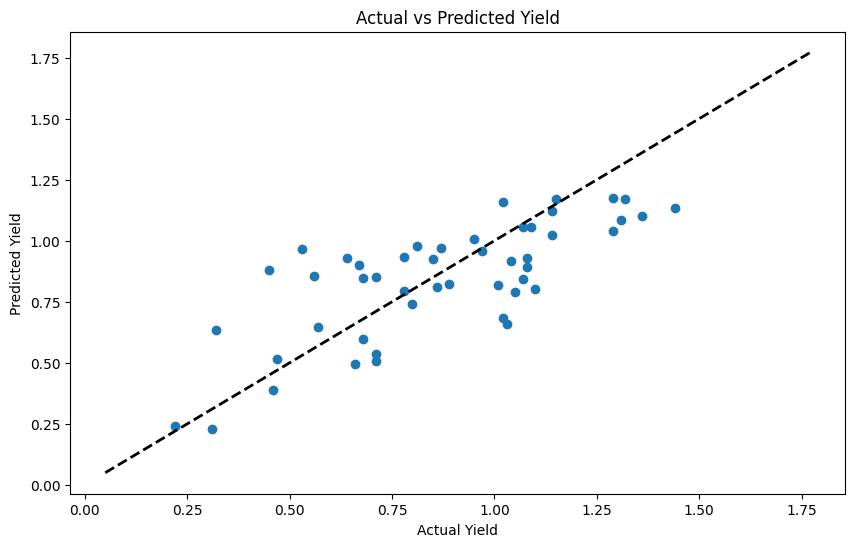

In [ ]:
# Visualizing actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

# **Forcast Modeling**

In [ ]:
# Select relevant columns for Kharif season
kharif_data = data[['Kharif Crop Area (Hectares)', 'Kharif Yield (Tonne/Hectare)',
                     '  Kharif Temperature (°C)', 'Kharif Rainfall (in mm)',
                     'Fertilizer Quantity (kg/ha)', 'Nitrogen (%)',
                     'Phosphorus (%)', 'Potassium (%)','Calcium (%)','Sulfur (%)','Zinc (%)','Boron (%)']]

# Define features (X) and target variable (Y)
X = kharif_data.drop(columns=['Kharif Yield (Tonne/Hectare)'])
Y = kharif_data['Kharif Yield (Tonne/Hectare)']


In [ ]:
# Display selected features
print(X.head())
print(Y.head())

   Kharif Crop Area (Hectares)    Kharif Temperature (°C)  \
0                        23543                       23.5   
1                        18643                       33.8   
2                        17892                       24.0   
3                        12305                       31.0   
4                        10732                       22.8   

   Kharif Rainfall (in mm)  Fertilizer Quantity (kg/ha)  Nitrogen (%)  \
0                   641.79                        84.35          5.43   
1                   466.40                        50.37          9.10   
2                   371.61                       168.99          3.64   
3                   586.40                       216.91          2.90   
4                   460.84                       140.59          2.92   

   Phosphorus (%)  Potassium (%)  Calcium (%)  Sulfur (%)  Zinc (%)  Boron (%)  
0            2.96           4.74         3.92        2.88      1.67       0.60  
1            3.87           1.26

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scale numerical features
    ('svr', SVR(kernel='linear'))  # Use SVR for regression tasks
])

pipeline.fit(X_train, Y_train)  # Fit the pipeline to the training data


Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(kernel='linear'))])

In [ ]:
# Create new data dynamically based on training features
new_data = pd.DataFrame([[10060, 150, 19, 140, 1.5, 0.8, 1.2,3.5,2.1,0.5,0.3]], columns=X.columns)

In [ ]:
# Ensure that new_data columns match exactly with the training feature names
print("Training Features:", list(X.columns))
print("New Data Features:", list(new_data.columns))


Training Features: ['Kharif Crop Area (Hectares)', '  Kharif Temperature (°C)', 'Kharif Rainfall (in mm)', 'Fertilizer Quantity (kg/ha)', 'Nitrogen (%)', 'Phosphorus (%)', 'Potassium (%)', 'Calcium (%)', 'Sulfur (%)', 'Zinc (%)', 'Boron (%)']
New Data Features: ['Kharif Crop Area (Hectares)', '  Kharif Temperature (°C)', 'Kharif Rainfall (in mm)', 'Fertilizer Quantity (kg/ha)', 'Nitrogen (%)', 'Phosphorus (%)', 'Potassium (%)', 'Calcium (%)', 'Sulfur (%)', 'Zinc (%)', 'Boron (%)']


In [ ]:
# Predict yield based on new data using the trained pipeline
forecasted_yield = pipeline.predict(new_data)

print(f"Forecasted Kharif Yield: {forecasted_yield[0]:.5f} Tonne/Hectare")  # Display predicted yield

Forecasted Kharif Yield: 1.74809 Tonne/Hectare
